In [ ]:
import corner
import pandas as pd
%pylab inline
plt.rcParams["font.size"]=20

In [102]:
titles = ['Tuesday Session', 'Thursday Session']

ERROR! Session/line number was not unique in database. History logging moved to new session 2654


In [139]:
tue = pd.read_csv("PUI2016gradesTue.csv")
thu = pd.read_csv("PUI2016gradesThu.csv")

In [140]:
tue.columns

Index(['EC project', 'EC project link', 'index', 'name', 'NETid', 'github',
       'github name', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'hw1', 'hw2', 'hw3', 'hw4', 'hw5', 'hw6',
       'hw7', 'hw8', 'hw9', 'hw10', 'hw11', 'hw12 (EC)', 'Unnamed: 29',
       'midterm (out of 100)', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'quiz average', 'hw average', 'midterm', 'grade to midterm no remove',
       'Unnamed: 38', 'quiz - lowest removed', 'hw - lowest removed',
       'grade till midterm', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'final out of 100', 'Unnamed: 47', 'final outof 35',
       'nidterm + final out of 100', 'EC', 'EC project.1', 'ECproject',
       'participation', 'homework', 'final grade', 'grade', 'improvement',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'index.1'],
      dtype='object')

In [141]:
thu.columns

Index(['Unnamed: 0',
       '                                                                                                  ',
       'index', 'name', 'NETid', 'github', 'github name', 'q1', 'q2', 'q3',
       'q4', 'q5', 'q6', 'q7', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'hw1', 'hw2', 'hw3', 'hw4', 'hw5', 'hw6', 'hw7', 'hw8', 'hw9', 'hw10',
       'hw11', 'Unnamed: 28', 'Unnamed: 29', 'midterm (out of 100)',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'quiz average',
       'hw average', 'midterm', 'grade up to midterm no remove', 'Unnamed: 38',
       'quiz - lowest removed', 'hw - lowest removed', 'grade till midterm',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'final out of 100', 'Unnamed: 47', 'final out  of 35',
       'nidterm + final out of 100', 'EC project', 'EC', 'ECproject',
       'participation', 'homework', 'final grade', 'grade', 'improvement',
       'Unnamed: 58', 'NETid.1', 'Unnamed: 60', 'Unnamed: 61', 'index.1'

In [142]:
for df in [tue, thu]:
    for feature in ['midterm (out of 100)', 'quiz average', 'hw average', 
                     'midterm', 'grade to midterm no remove',
                    'quiz - lowest removed', 'hw - lowest removed',
                    'grade till midterm','final out of 100',
                    'final outof 35','nidterm + final out of 100',
                    'EC', 'EC project.1', 'EC project.2','participation', 'homework', 
                     'final grade', 'grade', 'improvement']:
        if feature in df:
            df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [180]:
def plotfeature(fx, fy, kind='scatter', dline=False, fitline=False, repNaN=None):
    fig = plt.figure(figsize = (15,5))
    for i,df in enumerate([tue, thu]):
        if not repNaN is None:
            df['tmpxfeat'] = df[fx].replace('NaN', repNaN)
            fx1 = 'tmpxfeat'
            df['tmpyfeat'] = df[fy].replace('NaN', repNaN)
            fy1 = 'tmpyfeat'
        else:
            fx1=fx
            fy1=fy
        ax =fig.add_subplot(1,2,i+1)
        df.plot(x=fx1, y=fy1, kind=kind, ax=ax)
        if dline:
            if isinstance(dline, bool):
                xrange = ax.get_xlim()[1] - ax.get_xlim()[0]
                ax.plot(ax.get_xlim(), ax.get_xlim(), color="IndianRed")
                ax.text(ax.get_xlim()[0] + xrange*0.2, 
                        ax.get_ylim()[0] + xrange*0.17, 
                        "1:1", color='IndianRed', rotation='35')
            elif dline == 'bisect':
                xrange = (min(df[fx1]), max(df[fx1]))
                yrange = (min(df[fy1]), max(df[fy1]))
                ax.plot(xrange, yrange, color="IndianRed")
        corr =  df[fx1].corr(df[fy1])
        
        ax.set_title(titles[i] + r' $\rho$=%.1f'%corr)
        ax.set_xlabel(fx)
        ax.set_ylabel(fy)
    


In [209]:
def plothist(feat, repNaN=None):
    fig = plt.figure(figsize = (15,5))
    for i,df in enumerate([tue, thu]):
        ax = fig.add_subplot(1,2,i+1)
        if not repNaN is None:
            tmp = df[feat].dropna()
        else: 
            tmp = df[feat].replace('NaN', repNaN)
        ax.hist(tmp)
        ax.set_xlabel(feat)
        ax.set_title(titles[i])
        featmean = tmp.mean()
        ax.plot([featmean, featmean], ax.get_ylim(), '--', 
                color="IndianRed", lw=4, label='mean')
        ax.set_xlabel(feat)
        featmedian = tmp.median()
        ax.plot([featmedian, featmedian], ax.get_ylim(), 
                color="IndianRed", lw=4, label='median')
        featstd = tmp.std()
        ax.fill_between([featmedian-featstd, featmedian+featstd],
                        [ax.get_ylim()[0], ax.get_ylim()[0]], 
                        [ax.get_ylim()[1], ax.get_ylim()[1]],
                        color="IndianRed", lw=4, 
                label='st-dev', alpha=0.5)
    
    ax.legend(bbox_to_anchor=(1.15, 1))

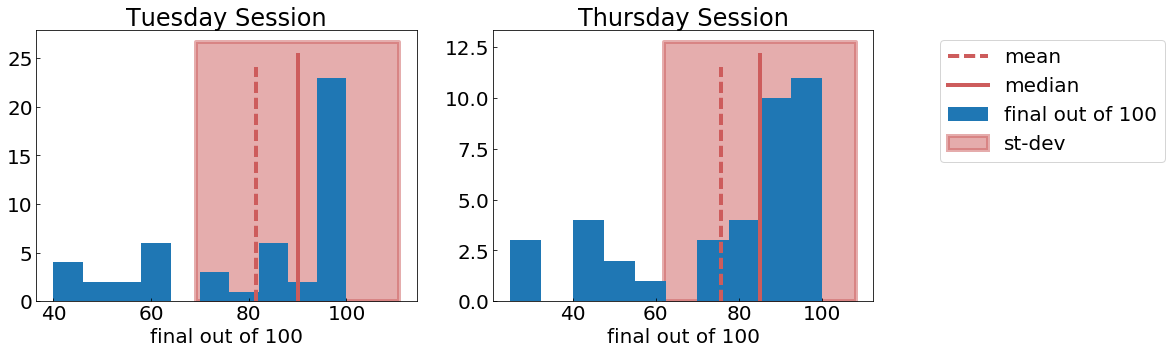

In [210]:
plothist('final out of 100')

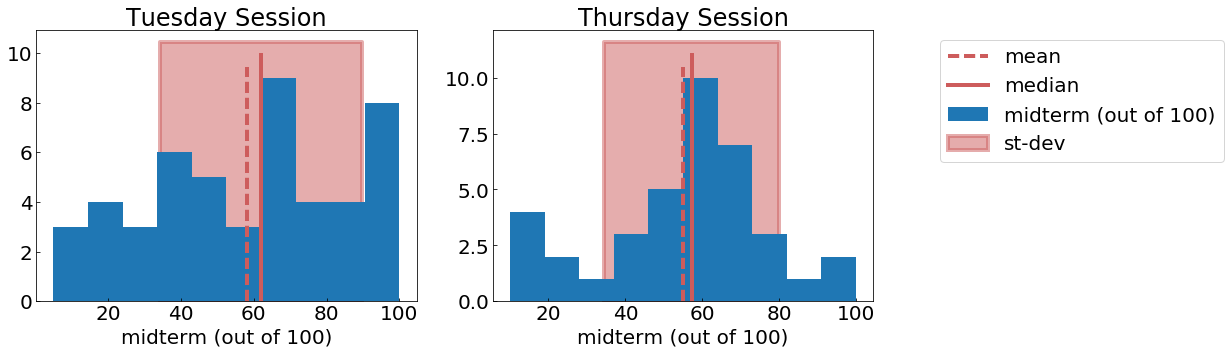

In [211]:
plothist('midterm (out of 100)')

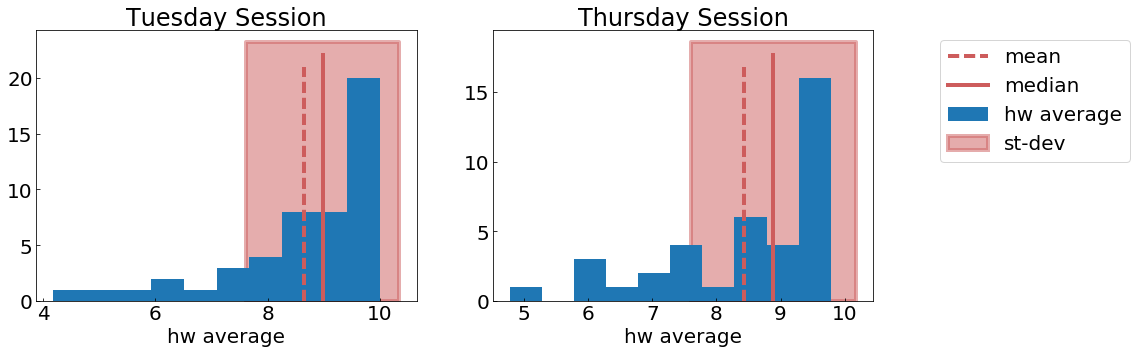

In [212]:
plothist('hw average')

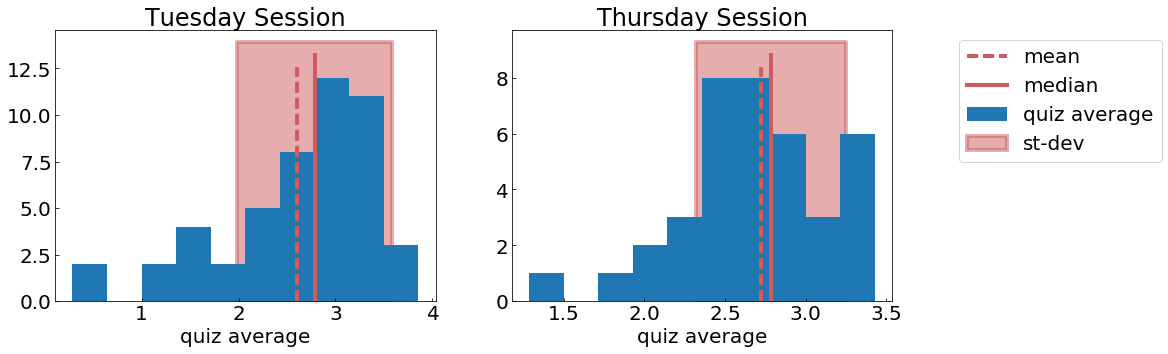

In [213]:
plothist('quiz average')

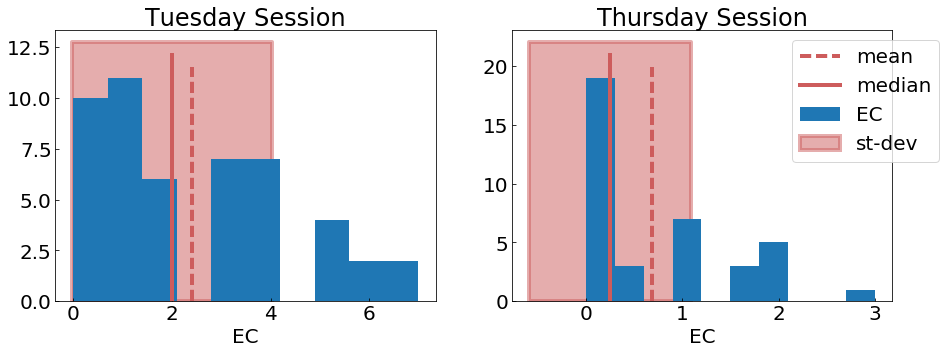

In [214]:
plothist('EC')

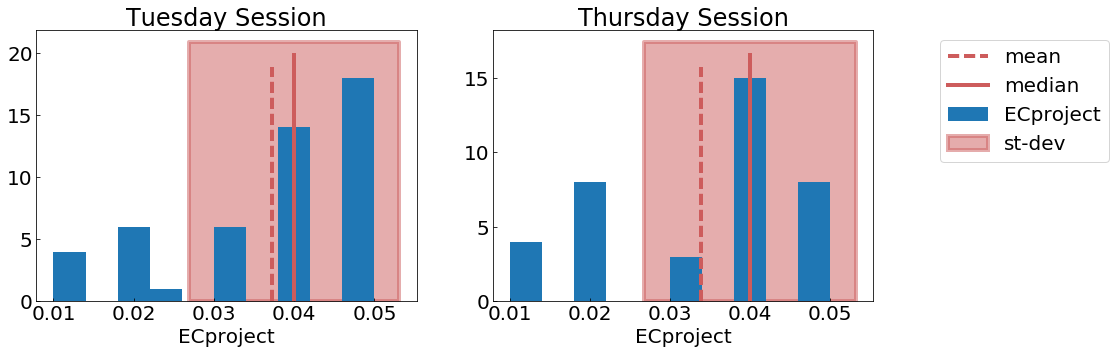

In [215]:
plothist('ECproject')

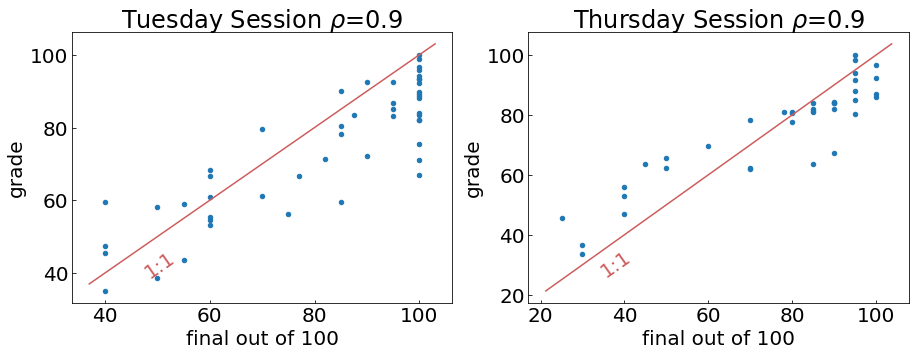

In [182]:
plotfeature('final out of 100', 'grade', dline=True)

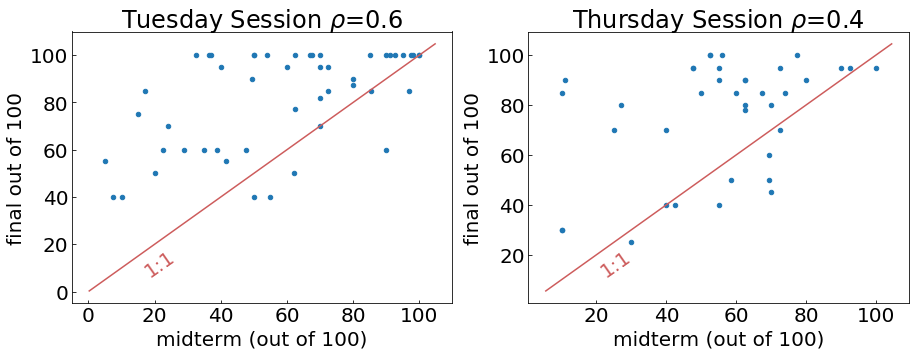

In [183]:
plotfeature('midterm (out of 100)', 'final out of 100', dline=True)

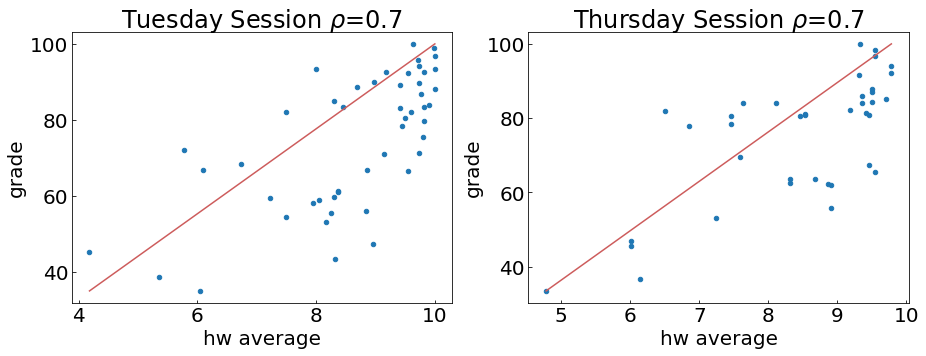

In [184]:
plotfeature('hw average', 'grade', dline='bisect', repNaN=0)

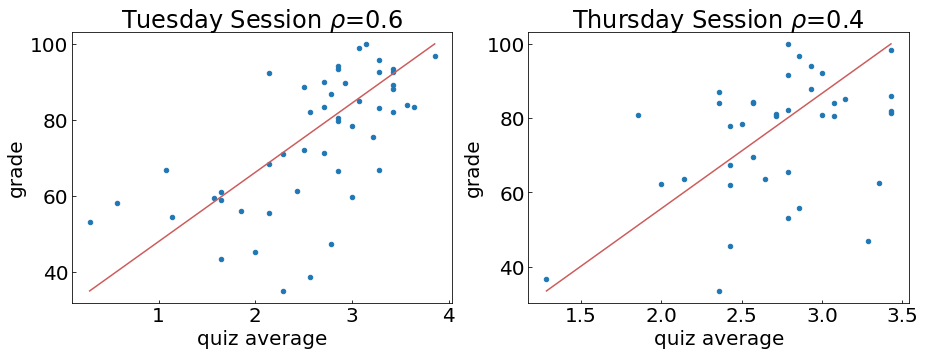

In [185]:
plotfeature('quiz average', 'grade', dline='bisect', repNaN=0)

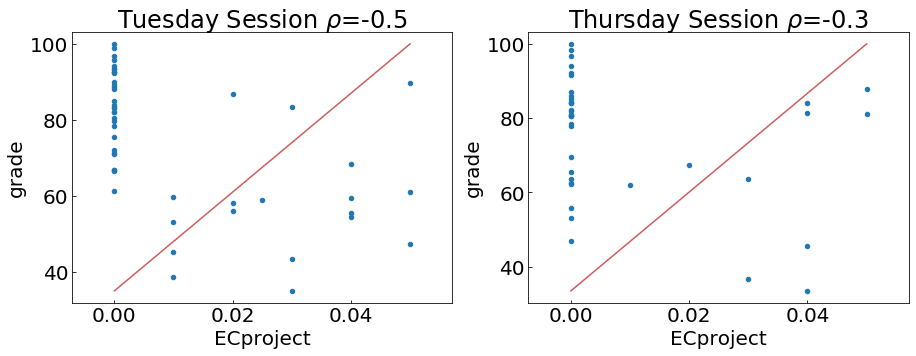

In [186]:
plotfeature('ECproject', 'grade', dline='bisect', repNaN=0)

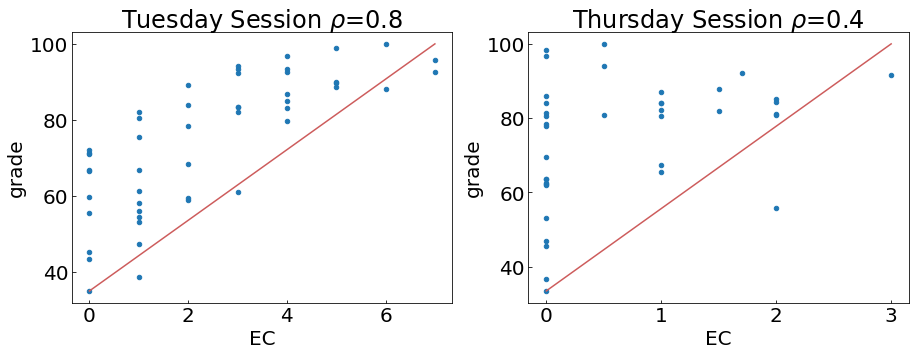

In [187]:
plotfeature('EC', 'grade', dline='bisect', repNaN=0)

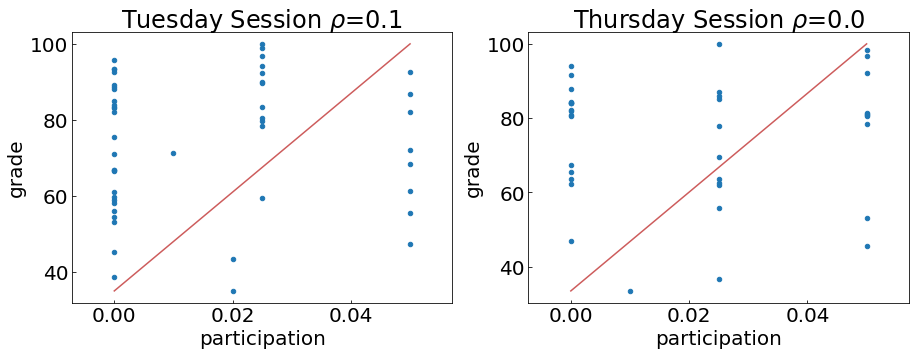

In [188]:
plotfeature('participation', 'grade', dline='bisect', repNaN=0)